In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential

import pathlib

import os

2023-02-06 13:51:39.114434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-06 13:51:39.231847: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-06 13:51:39.231869: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-06 13:51:39.960573: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

*/*.JPG, */*.jpg and */*.* all return different values, meaning the dataset has different file types

In [2]:
data_dir = pathlib.Path('plantvillage')

folders = os.listdir(data_dir)

image_count = len(list(data_dir.glob('*/*.*')))
print(image_count)


18835


In [3]:
bacterial_spot = list(data_dir.glob('Tomato___Bacterial_spot/*'))
early_blight = list(data_dir.glob('Tomato___Early_blight/*'))
healthy = list(data_dir.glob('Tomato___healthy/*'))
late_blight = list(data_dir.glob('Tomato___Late_blight/*'))
leaf_mold = list(data_dir.glob('Tomato___Leaf_Mold/*'))
septoria_leaf_spot = list(data_dir.glob('Tomato___Septoria_leaf_spot/*'))
spider_mites = list(data_dir.glob('Tomato___Spider_mites Two-spotted_spider_mite/*'))
target_spot = list(data_dir.glob('Tomato___Target_Spot/*'))
mosaic = list(data_dir.glob('Tomato___Tomato_mosaic_virus/*'))
yellow_leaf_curl = list(data_dir.glob('Tomato___Tomato_Yellow_Leaf_Curl_Virus/*'))

for img in yellow_leaf_curl:
    arr = np.array(PIL.Image.open(img))
    if not (arr.shape == (256, 256, 3)):
        raise Exception

for subdir in list(data_dir.glob('*')):
    print(subdir)
    print(len(list(subdir.glob('*'))))
    imgs = list(subdir.glob('*'))
    PIL.Image.open(str(imgs[0]))

plantvillage/Tomato___Bacterial_spot
2127
plantvillage/Tomato___Early_blight
1000
plantvillage/Tomato___Late_blight
1909
plantvillage/Tomato___Leaf_Mold
1000
plantvillage/Tomato___Septoria_leaf_spot
1771
plantvillage/Tomato___Spider_mites Two-spotted_spider_mite
1676
plantvillage/Tomato___Target_Spot
1404
plantvillage/Tomato___Tomato_Yellow_Leaf_Curl_Virus
5357
plantvillage/Tomato___Tomato_mosaic_virus
1000
plantvillage/Tomato___healthy
1591


In [4]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 18835 files belonging to 10 classes.
Using 15068 files for training.


2023-02-06 13:51:47.469483: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-06 13:51:47.469521: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-06 13:51:47.469543: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vedkm-foliagefixermode-l8v7u6tacyt): /proc/driver/nvidia/version does not exist
2023-02-06 13:51:47.469835: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 18835 files belonging to 10 classes.
Using 3767 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']


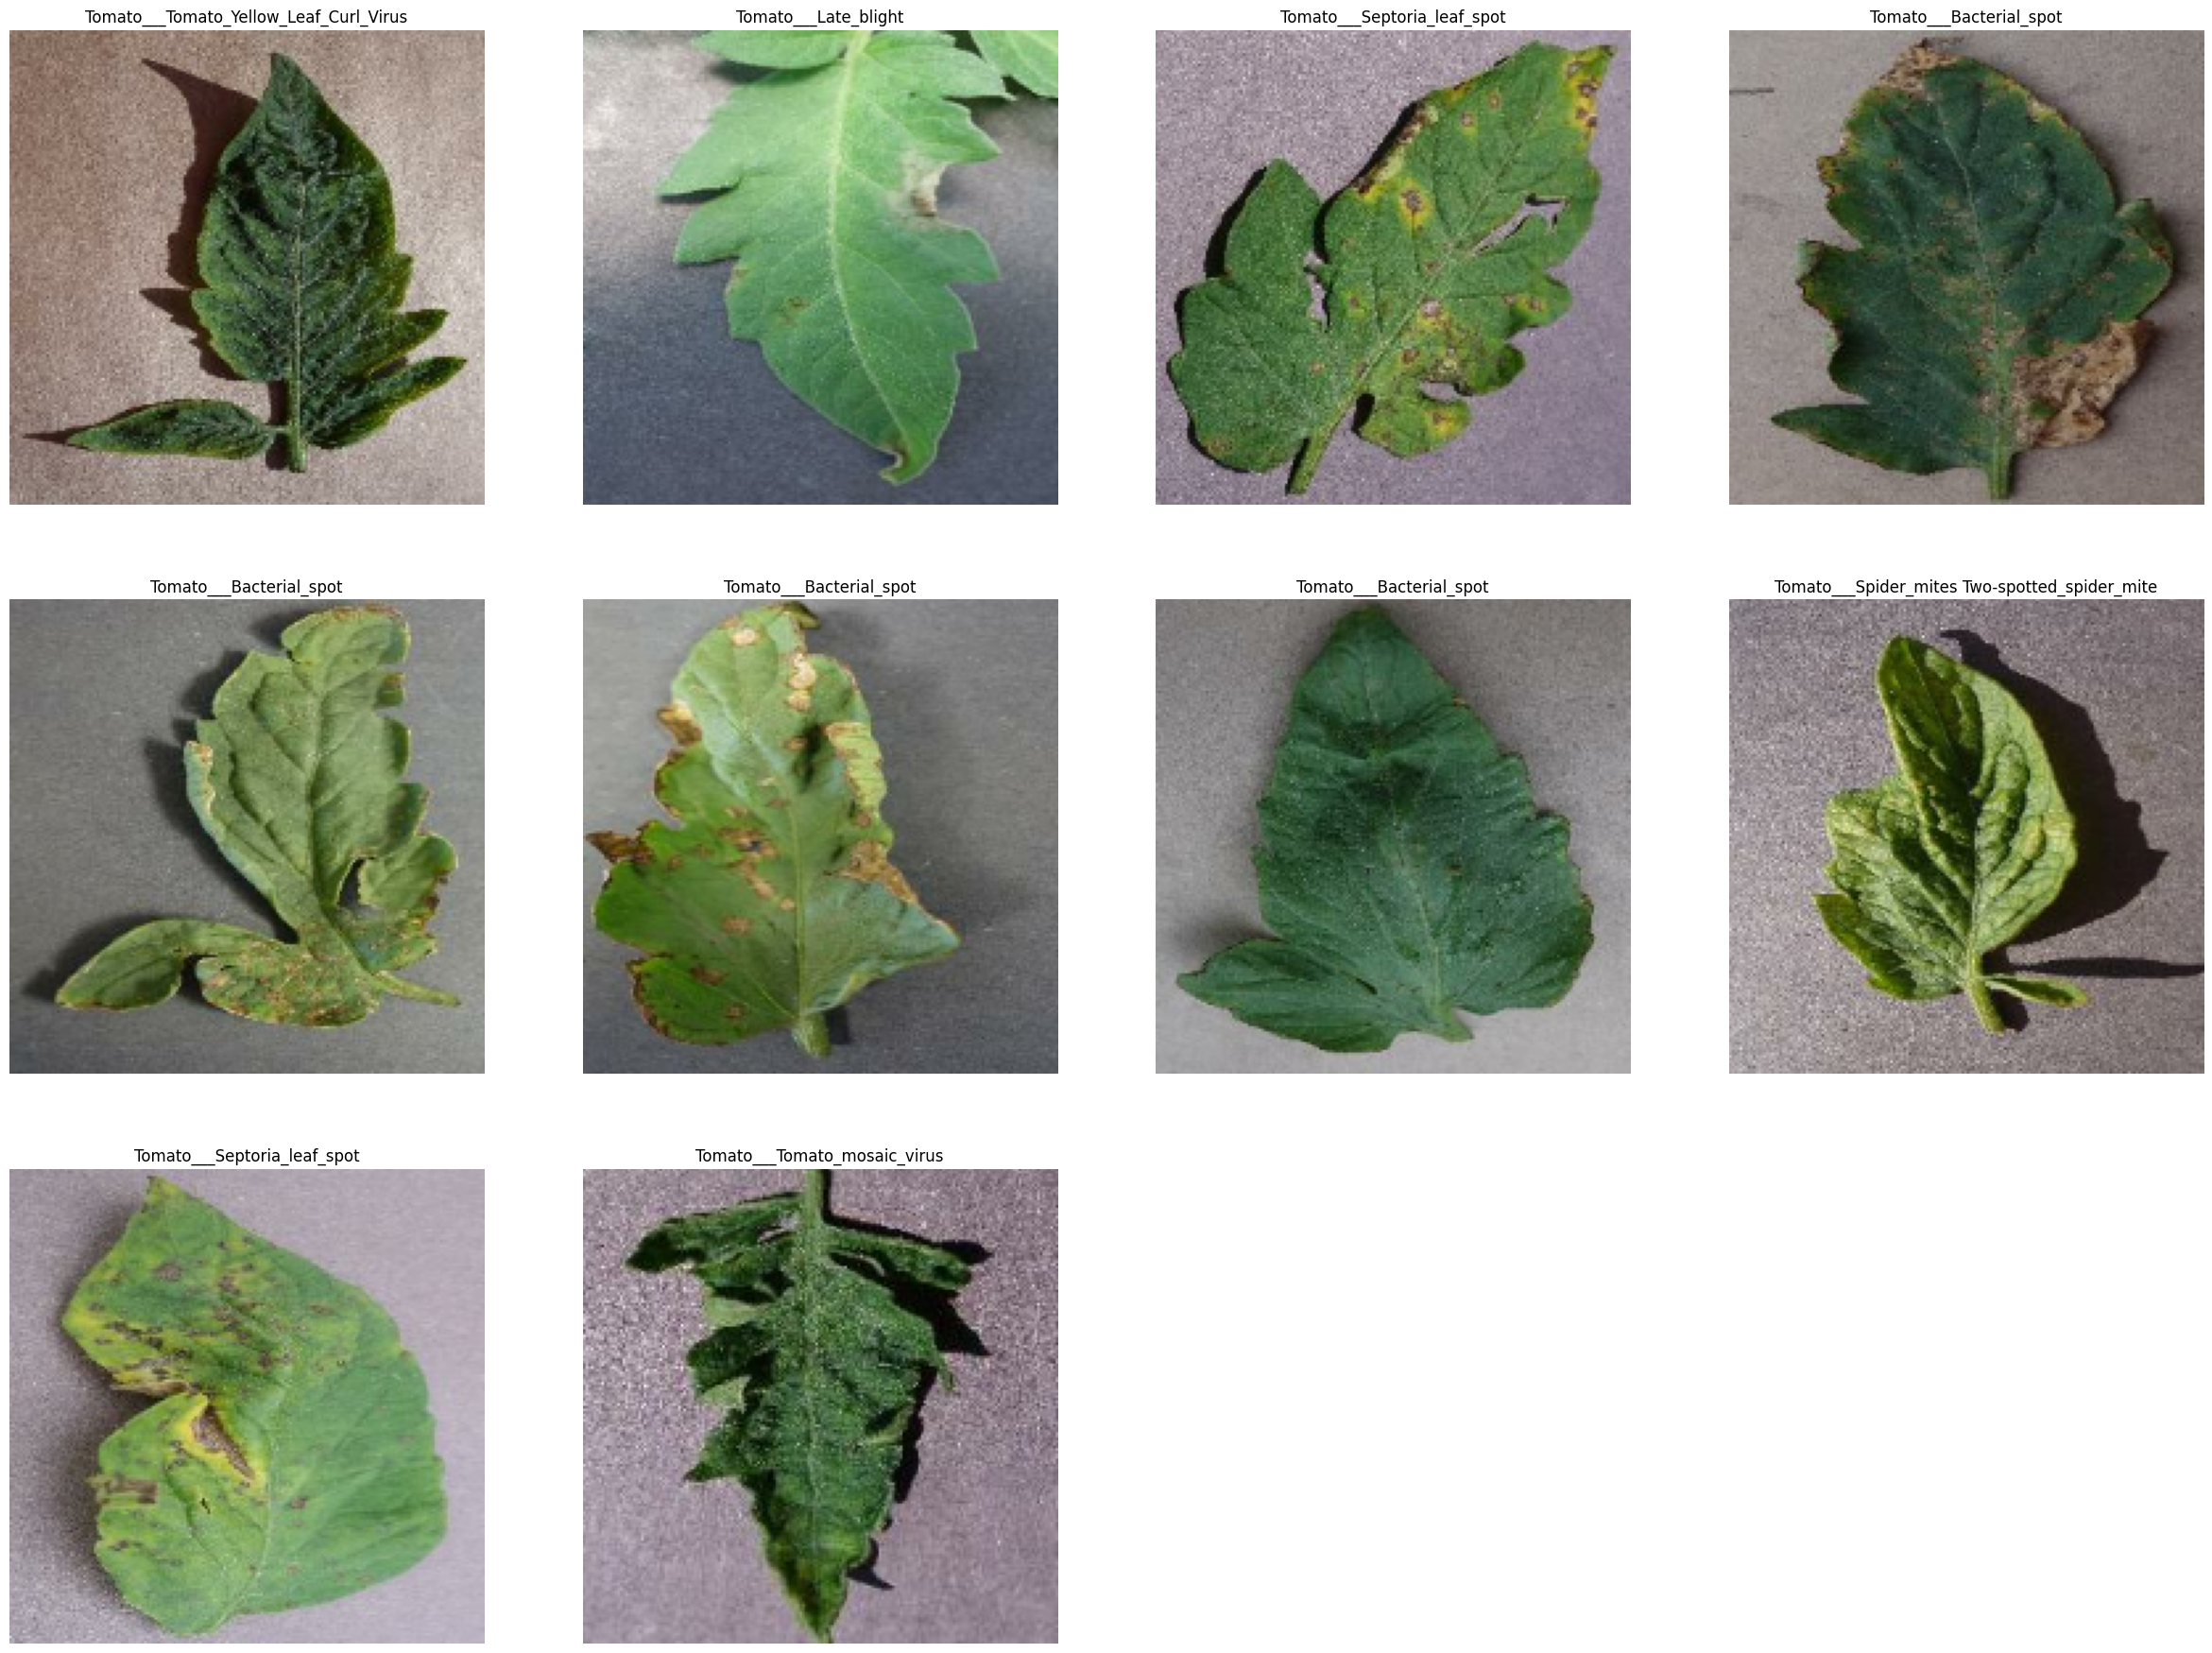

In [6]:
plt.figure(figsize=(30, 30))
for images, labels in train_ds.take(1):
  for i in range(10):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [9]:
normalization_layer = layers.Rescaling(scale=1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.949236


In [10]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [11]:
num_classes = len(class_names)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2), #or 0.2
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# model = Sequential()
# inputShape = (img_height, img_width, 3)
# chanDim = -1 #or -1
# model.add(layers.Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
# model.add(layers.Activation("relu"))
# model.add(layers.BatchNormalization(axis=chanDim))
# model.add(layers.MaxPooling2D(pool_size=(3, 3)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(64, (3, 3), padding="same"))
# model.add(layers.Activation("relu"))
# model.add(layers.BatchNormalization(axis=chanDim))
# model.add(layers.Conv2D(64, (3, 3), padding="same"))
# model.add(layers.Activation("relu"))
# model.add(layers.BatchNormalization(axis=chanDim))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Conv2D(128, (3, 3), padding="same"))
# model.add(layers.Activation("relu"))
# model.add(layers.BatchNormalization(axis=chanDim))
# model.add(layers.Conv2D(128, (3, 3), padding="same"))
# model.add(layers.Activation("relu"))
# model.add(layers.BatchNormalization(axis=chanDim))
# model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.Dropout(0.25))
# model.add(layers.Flatten())
# model.add(layers.Dense(1024))
# model.add(layers.Activation("relu"))
# model.add(layers.BatchNormalization())
# model.add(layers.Dropout(0.5))
# model.add(layers.Dense(num_classes))

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
epochs=50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
471/471 [==============================] - 117s 242ms/step - loss: 1.1157 - accuracy: 0.6230 - val_loss: 1.7182 - val_accuracy: 0.5171
Epoch 2/50
471/471 [==============================] - 112s 237ms/step - loss: 0.5351 - accuracy: 0.8130 - val_loss: 2.0090 - val_accuracy: 0.5429
Epoch 3/50
471/471 [==============================] - 113s 239ms/step - loss: 0.4008 - accuracy: 0.8593 - val_loss: 0.7591 - val_accuracy: 0.7627
Epoch 4/50
471/471 [==============================] - 114s 241ms/step - loss: 0.3344 - accuracy: 0.8802 - val_loss: 1.0805 - val_accuracy: 0.7106
Epoch 5/50
471/471 [==============================] - 112s 238ms/step - loss: 0.2812 - accuracy: 0.8996 - val_loss: 0.6659 - val_accuracy: 0.8097
Epoch 6/50
471/471 [==============================] - 115s 244ms/step - loss: 0.2333 - accuracy: 0.9182 - val_loss: 1.6275 - val_accuracy: 0.6350
Epoch 7/50
471/471 [==============================] - 114s 242ms/step - loss: 0.2128 - accuracy: 0.9251 - val_loss: 0.9112 -

In [14]:
import datetime

# print(str(datetime.datetime.now()))
model.save('saved_model/model'+str(datetime.datetime.now()))

INFO:tensorflow:Assets written to: saved_model/model2023-02-06 15:59:20.149840/assets


INFO:tensorflow:Assets written to: saved_model/model2023-02-06 15:59:20.149840/assets


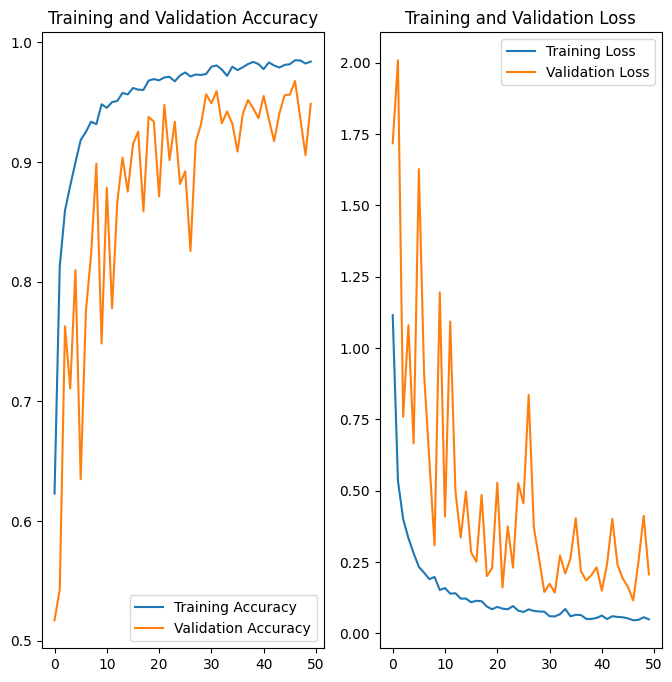

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
model.evaluate(val_ds)

118/118 [==============================] - 14s 121ms/step - loss: 0.2070 - accuracy: 0.9485


[0.2070205956697464, 0.9485001564025879]

CLASSIFY NEW DATA

In [1]:
leaf_path = pathlib.Path('yellowcurl2.png')

img = tf.keras.utils.load_img(
    leaf_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

NameError: name 'pathlib' is not defined

In [18]:
10 MORE EPOCHS

SyntaxError: invalid syntax (413381868.py, line 1)

In [ ]:
# epochs=10
# history = model.fit(
#   train_ds,
#   validation_data=val_ds,
#   epochs=epochs
# )

Epoch 1/10
471/471 [==============================] - 111s 235ms/step - loss: 0.1319 - accuracy: 0.9519 - val_loss: 0.5452 - val_accuracy: 0.8569
Epoch 2/10
471/471 [==============================] - 105s 224ms/step - loss: 0.0981 - accuracy: 0.9649 - val_loss: 0.2755 - val_accuracy: 0.9124
Epoch 3/10
471/471 [==============================] - 105s 222ms/step - loss: 0.1090 - accuracy: 0.9617 - val_loss: 0.8804 - val_accuracy: 0.8057
Epoch 4/10
471/471 [==============================] - 140s 298ms/step - loss: 0.1128 - accuracy: 0.9607 - val_loss: 0.2677 - val_accuracy: 0.9225
Epoch 5/10
471/471 [==============================] - 104s 220ms/step - loss: 0.0914 - accuracy: 0.9688 - val_loss: 0.2667 - val_accuracy: 0.9161
Epoch 6/10
471/471 [==============================] - 104s 221ms/step - loss: 0.0849 - accuracy: 0.9697 - val_loss: 0.6385 - val_accuracy: 0.8468
Epoch 7/10
471/471 [==============================] - 105s 222ms/step - loss: 0.0894 - accuracy: 0.9679 - val_loss: 0.3637 -

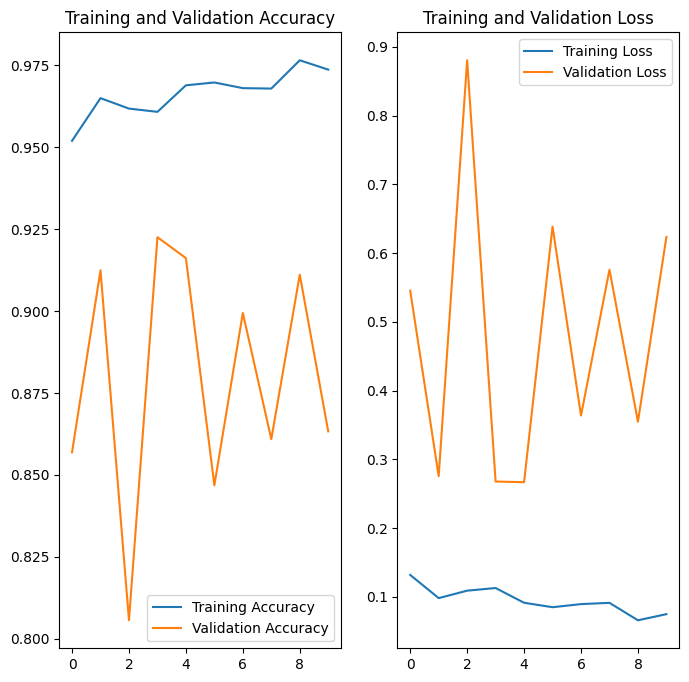

In [ ]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(8, 8))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()

In [ ]:
# model.evaluate(val_ds)

118/118 [==============================] - 14s 121ms/step - loss: 0.6235 - accuracy: 0.8633


[0.6234539747238159, 0.8632864356040955]

In [ ]:
# leaf_path = pathlib.Path('mosaic2.png')

# img = tf.keras.utils.load_img(
#     leaf_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )